# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
toggle_cell()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # 
# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # 
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # chi square 有问题
# ipath= "./data/NCDC/cn/wusu/dat.txt" # chi square 有问题, bandwidth 过小
# ipath= "./data/NCDC/cn/binhai/dat.txt" # good, but recent 5 year data may have been corrupted, 05-09 is good
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Is this dataset correct?
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data is weird

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" # good
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly over a threshold, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

date           HrMn           dir          speed  \
count    281347.000000  281347.000000  281347.00000  281347.000000   
mean   20015439.123819    1106.450579     181.14116       3.947066   
std       97864.727409     681.443079     114.82452       1.800596   
min    19800101.000000       0.000000       0.00000       0.500000   
25%    19931128.000000     500.000000      80.00000       3.000000   
50%    20030820.000000    1100.000000     160.00000       4.000000   
75%    20101108.000000    1700.000000     300.00000       5.000000   
max    20150301.000000    2357.000000     359.00000      30.000000   

        dir_windrose  
count  281347.000000  
mean      158.748975  
std       107.843629  
min         0.000000  
25%        70.000000  
50%       140.000000  
75%       250.000000  
max       350.000000

False


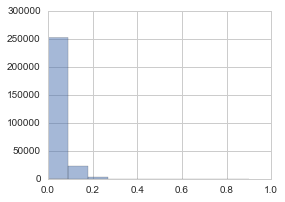

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

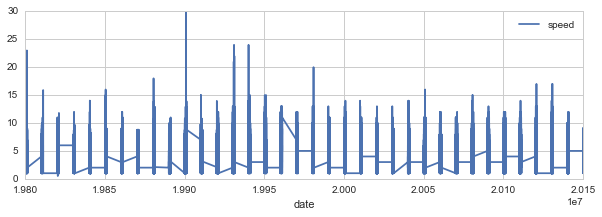

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

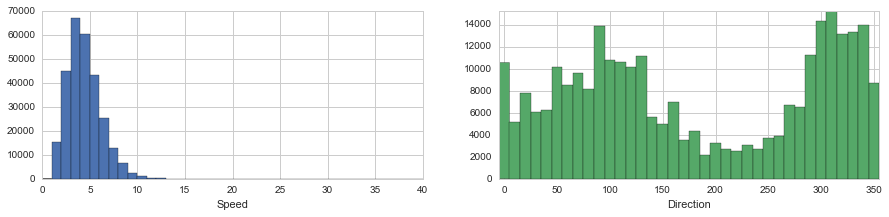

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

date  HrMn   type  dir  speed  dir_windrose  decimal
date                                                              
19940128  19940128     0  FM-15  119      3           331        0
19940718  19940718  1000  FM-15  337      5           113        0
19940805  19940805  1100  FM-15  335      9           115        0
19940810  19940810   500  FM-15  319     10           131        0
19940903  19940903  2100  FM-15  331      5           119        0
19941203  19941203  1400  FM-15  316      3           134        0
19950403  19950403  1300  FM-15  337      3           113        0
19980603  19980603  1100  FM-15   59     10            31        0
19980909  19980909  1200  FM-15  359     20            91        0

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed  dir_windrose  decimal  incre  \
date                                                                        
19900917  19900917     0  SY-MT  130     30           320        0   27.9   
19931012  19931012  2300  FM-16  320     24           130        0   22.0   
19940127  19940127  2300  FM-16  170     24           280        0   21.0   
19801008  19801008  2100  FM-12    0     23            90        0   21.0   
19931221  19931221  2200  FM-15  110     22           340        0   19.0   
19800714  19800714   900  FM-12  280     22           170        0   20.0   
19930802  19930802  1400  FM-15  140     21           310        0   17.0   
19880507  19880507    25  FM-15  170     18           280        0   11.0   
20130801  20130801   730  FM-15  170     17           280        0   12.0   
20120808  20120808   530  FM-15    0     17            90        0    2.0   

          incre_reverse  
date                     
19900917           24.9  
19931012           20.0  
19940127           20.0  
19801008           19.0  
19931221           20.0  
19800714           20.0  
19930802           19.0  
19880507            8.2  
20130801            7.0  
20120808            4.0

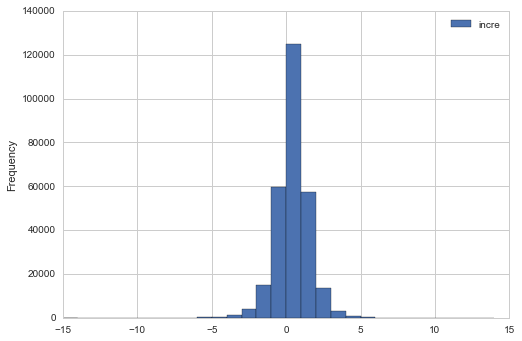

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 9


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed  dir_windrose  decimal  incre  \
date                                                                        
19880507  19880507    25  FM-15  170   18.0           280      0.0   11.0   
20120808  20120808   530  FM-15    0   17.0            90      0.0    2.0   
20130801  20130801   730  FM-15  170   17.0           280      0.0   12.0   
19850430  19850430   800  FM-15  310   16.0           140      0.0    9.8   
20050911  20050911  1700  FM-15    0   16.0            90      0.0    4.0   
19811219  19811219   700  FM-15  140   15.9           310      0.9    7.9   
19811219  19811219   500  SY-MT  140   15.9           310      0.9    7.9   
19850312  19850312   900  SY-MT    0   15.0            90      0.0    9.9   
19910209  19910209   600  SY-MT  200   15.0           250      0.0   10.9   
19951107  19951107   400  FM-15  110   15.0           340      0.0    5.0   

          incre_reverse  
date                     
19880507            8.2  
20120808            4.0  
20130801            7.0  
19850430           11.0  
20050911            4.0  
19811219            3.1  
19811219            7.9  
19850312           10.9  
19910209            9.9  
19951107            2.0

#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      10555
10      5130
20      7804
30      6064
40      6251
50     10110
60      8530
70      9575
80      8128
90     13902
100    10757
110    10636
120    10161
130    11167
140     5624
150     4938
160     6934
170     3546
180     4387
190     2173
200     3221
210     2703
220     2529
230     3030
240     2716
250     3684
260     3877
270     6740
280     6489
290    11213
300    14350
310    15205
320    13146
330    13326
340    13999
350     8728
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

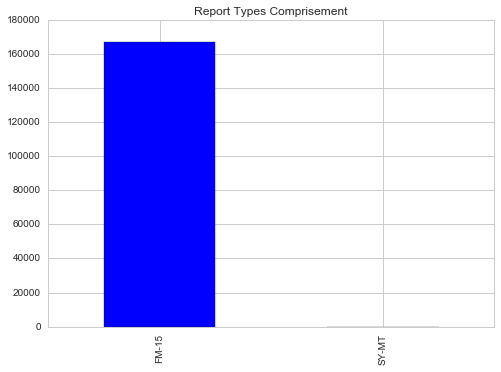

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

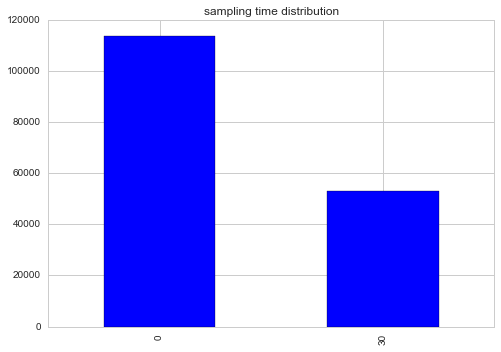

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       7027
100     8319
200     8613
300     7538
400     8951
500     8956
600     7690
700     9245
800     9308
900     7970
1000    8956
1100    8634
1200    7622
1300    8263
1400    7913
1500    6972
1600    7328
1700    7150
1800    6498
1900    6973
2000    6956
2100    6562
2200    7283
2300    7508
Name: HrMn, dtype: int64

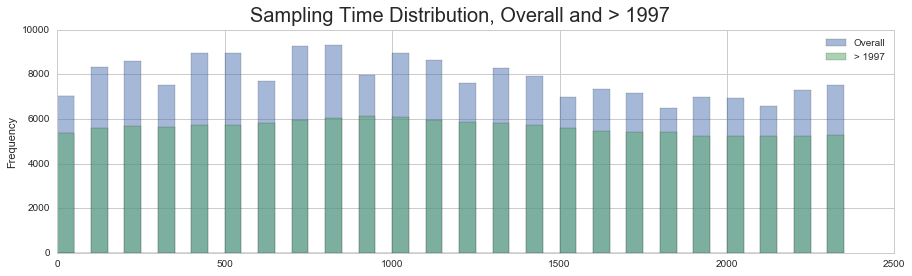

In [17]:
MID_YEAR = int(((min(df.date)+max(df.date))/2 )/10000)
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

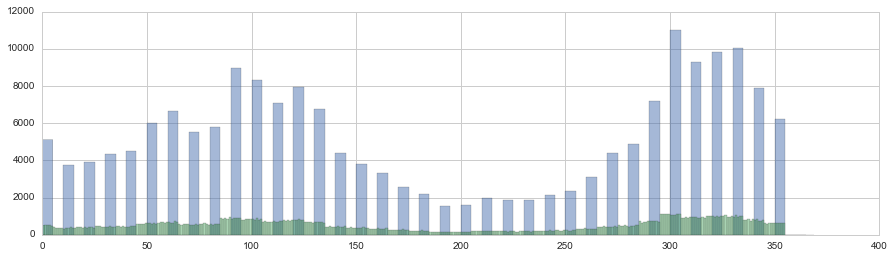

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)
    
    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

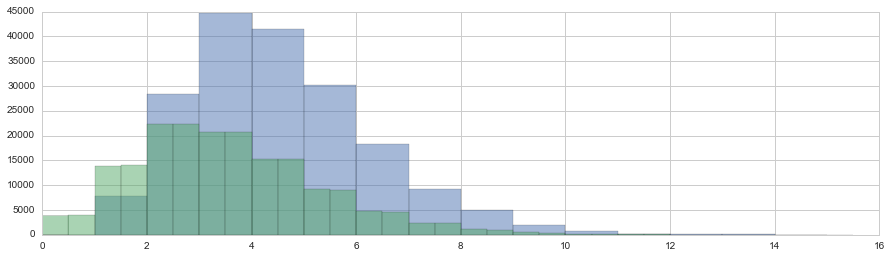

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

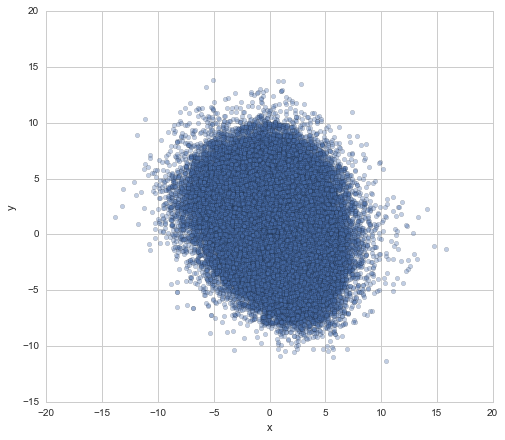

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

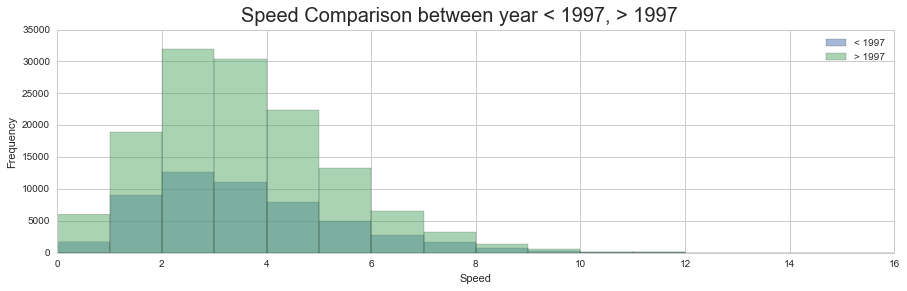

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

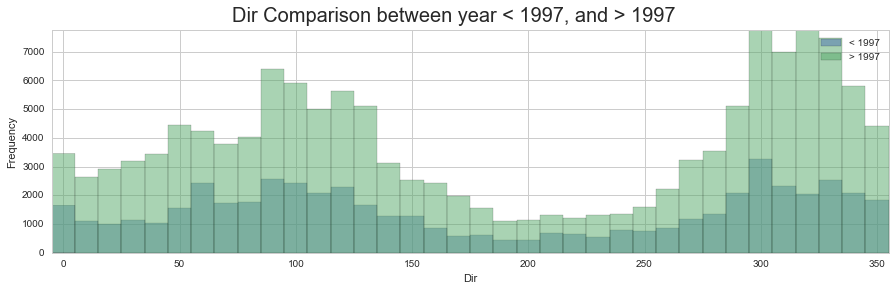

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

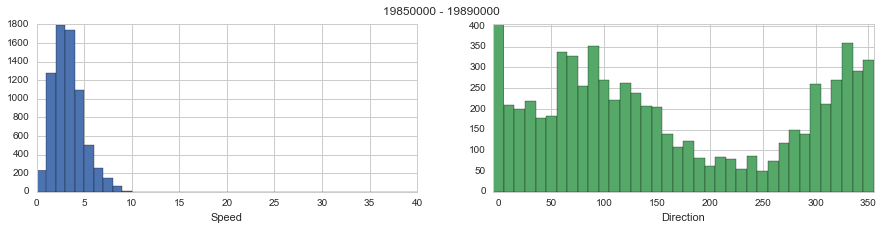

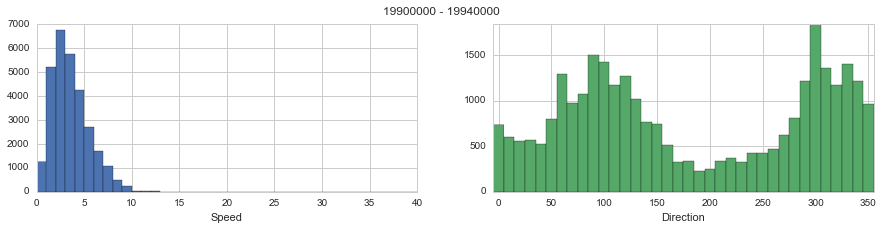

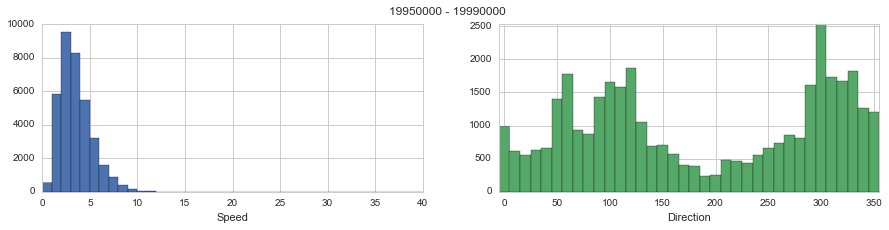

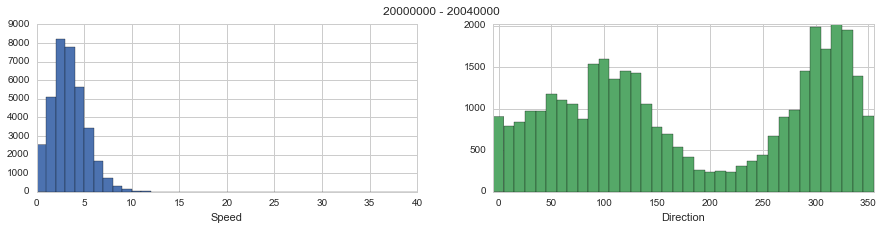

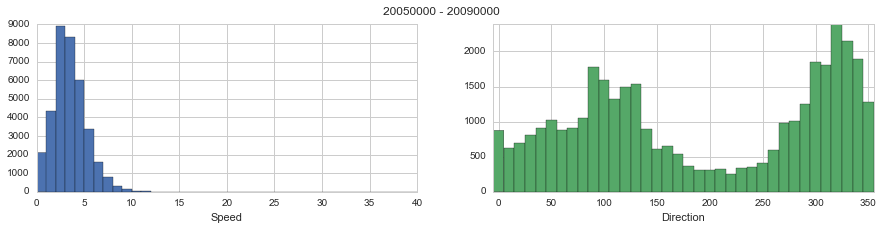

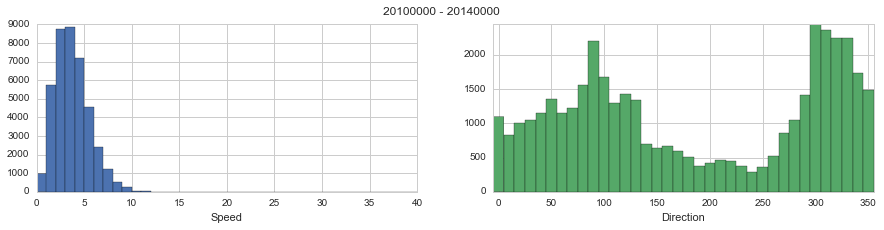

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time, end_time-10000)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 10
Report type used: FM-15
Sampling time used: 0


date          HrMn           dir         speed  \
count     40570.000000  40570.000000  40570.000000  40570.000000   
mean   20120825.171876   1137.670693    184.941524      3.748610   
std       14071.224503    685.007356    115.995546      1.835426   
min    20100101.000000      0.000000     -4.983281      0.001067   
25%    20110413.000000    600.000000     83.160853      2.389208   
50%    20120712.000000   1100.000000    163.672035      3.534431   
75%    20130930.000000   1700.000000    304.720931      4.848711   
max    20141231.000000   2300.000000    354.997140     14.732438   

       dir_windrose  decimal         incre  incre_reverse             x  \
count  40570.000000    40570  40570.000000   40570.000000  40570.000000   
mean     152.993098        0      0.008578       0.008430      0.883744   
std      106.550156        0      0.886869       0.897068      2.525338   
min        0.000000        0     -9.000000     -12.000000    -11.203816   
25%       70.000000        0      0.000000       0.000000     -0.649591   
50%      130.000000        0      0.000000       0.000000      1.155322   
75%      230.000000        0      1.000000       1.000000      2.688924   
max      350.000000        0      8.000000       8.000000     14.693744   

                  y  
count  40570.000000  
mean       0.376644  
std        3.181352  
min      -10.886611  
25%       -1.902224  
50%        0.092914  
75%        2.703446  
max       13.478094

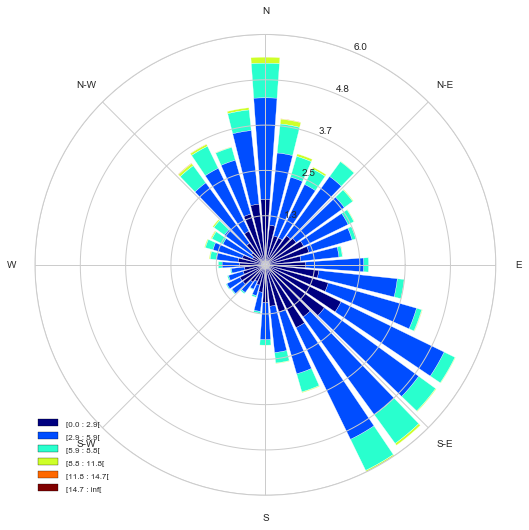

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

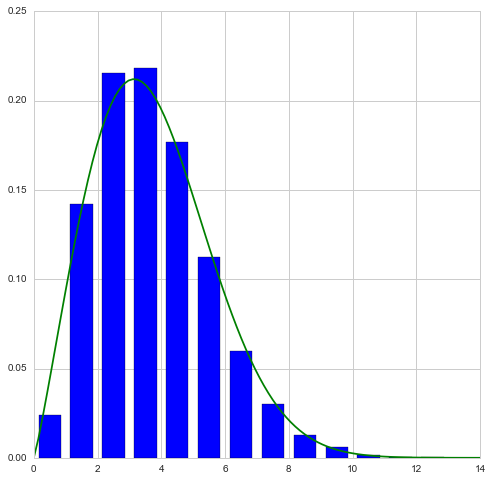

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

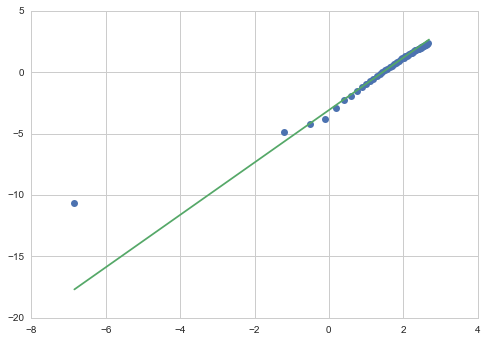

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


# 3. Kernel Density Estimation

In [32]:
sample = SPEED_SET

In [33]:
# # The bandwidth value sometimes would be too radical
# from sklearn.grid_search import GridSearchCV

# if knot_unit:
#     bandwidth_range = arange(0.5,2,0.2)
# else:
#     bandwidth_range = arange(0.4,1,0.1)

# grid = GridSearchCV(neighbors.KernelDensity(),
#                     {'bandwidth': bandwidth_range},
#                     n_jobs=-1, cv=4) 
# grid.fit(sample)
# bandwidth = grid.best_params_['bandwidth']

In [34]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.7 289
[  3.86576924e-09   2.15131454e-08   2.50744515e-07   1.53369124e-06
   3.89049242e-06]


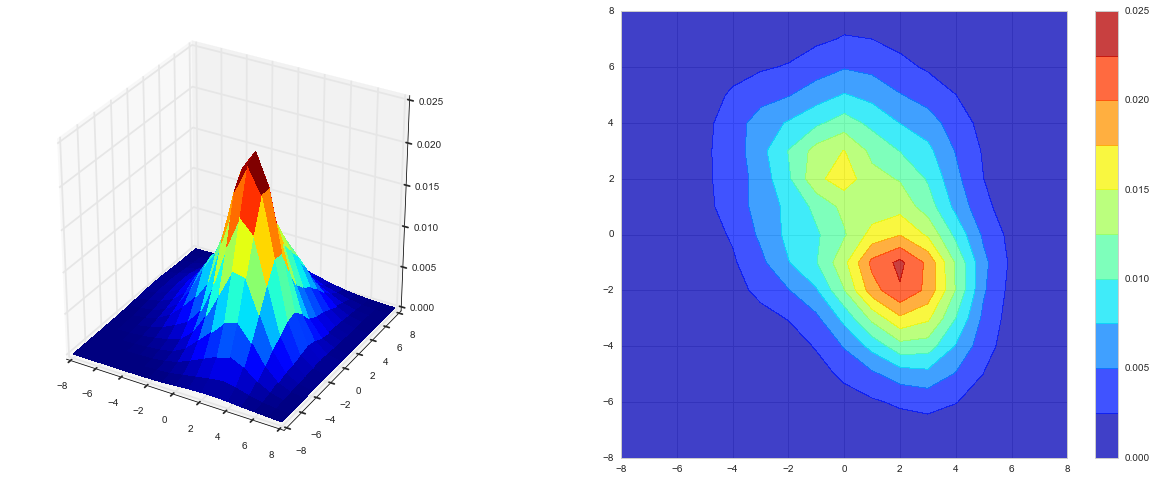

In [35]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [36]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [37]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [38]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.409701  2.084753 -1.810258  1.658384  2.209632 -0.230924
2  0.300809  1.430604  2.561275  2.177586  2.779747 -0.211134
3  0.289490 -1.384231  1.201616  2.391034  2.759844 -0.251694

GMM Plot Result
0.409701487011 [[ 2.08475259 -1.81025813]] [ 1.56691705  2.27540795] -160.780124082
0.300808793181 [[ 1.43060363  2.56127502]] [ 2.06627185  2.86345913] -159.713893156
0.289489719809 [[-1.38423125  1.20161599]] [ 2.18026799  2.92919979] -149.882349327


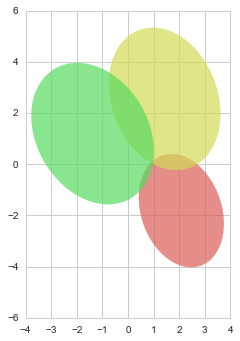

In [39]:
plot_gmm_ellipses(gmm_em_result)

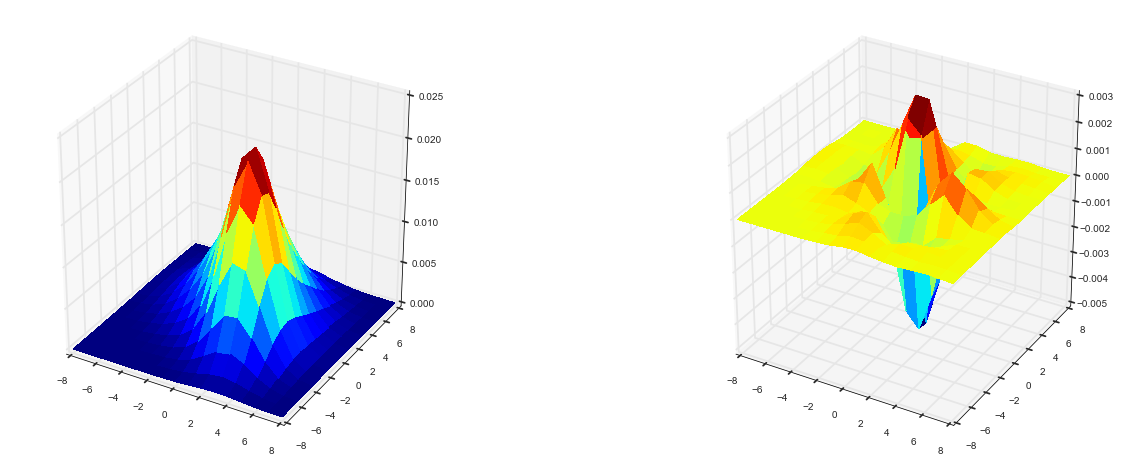

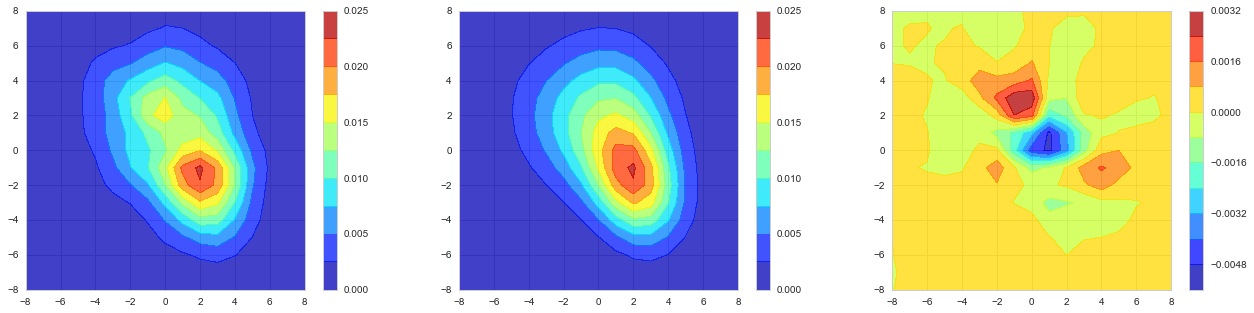

In [40]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [41]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

Chi_square     K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.020846  0.0264  6.305487e-07    0.034356     0.231607  0.973202

# 5. Least Square Prob Estimation

In [42]:
sample = SPEED_SET
points = FITTING_RANGE

In [43]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.51447514798304
     jac: array([ -2.82073379e-01,  -4.76837158e-07,   7.15255737e-07,
        -2.38418579e-06,  -2.14576721e-06,   0.00000000e+00,
        -2.82086492e-01,   1.19209290e-06,  -3.57627869e-07,
        -5.96046448e-07,  -4.76837158e-07,  -4.76837158e-07,
        -2.82092690e-01,   0.00000000e+00,   7.15255737e-07,
        -1.19209290e-07,   7.15255737e-07,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1450
     nit: 71
    njev: 71
  status: 0
 success: True
       x: array([ 0.37776427,  2.27608222, -1.97304636,  1.64682879,  1.99472534,
       -0.06883953,  0.59370682,  0.0579774 ,  1.93568911,  2.81280156,
        3.00289115,  0.00916856,  0.02852891, -0.49167317,  2.78452377,
        1.08119403,  0.86042842,  0.01835752])

## 5.1 GMM Result

In [44]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.593707  0.057977  1.935689  2.812802  3.002891  0.009169
2  0.377764  2.276082 -1.973046  1.646829  1.994725 -0.068840
3  0.028529 -0.491673  2.784524  1.081194  0.860428  0.018358

GMM Plot Result
0.593706821369 [[ 0.0579774   1.93568911]] [ 2.81184174  3.00378993] 176.012276711
0.377764272956 [[ 2.27608222 -1.97304636]] [ 1.63489769  2.00451585] -170.176835846
0.0285289056751 [[-0.49167317  2.78452377]] [ 0.86003356  1.08150814] -87.7220610447


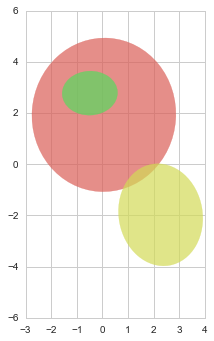

In [45]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [46]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017587  0.012466  1.828728e-07    0.018502     0.124729  0.992228

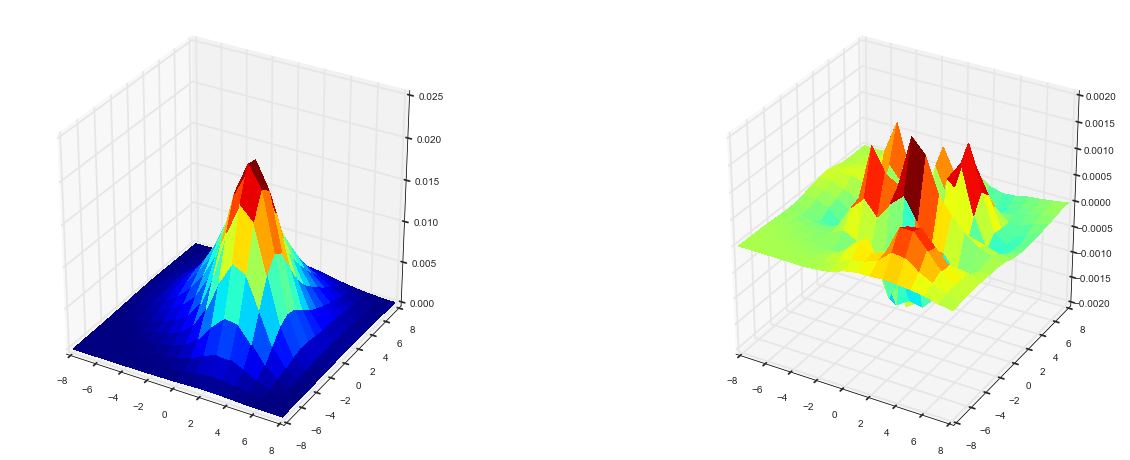

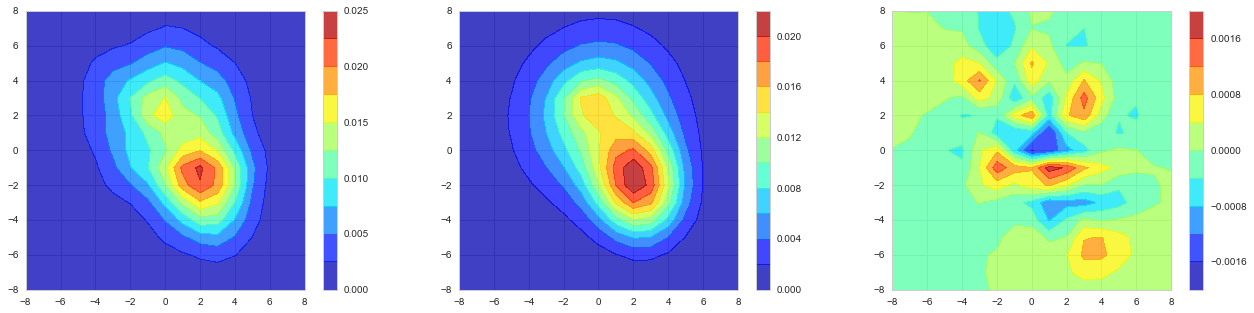

In [47]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [48]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

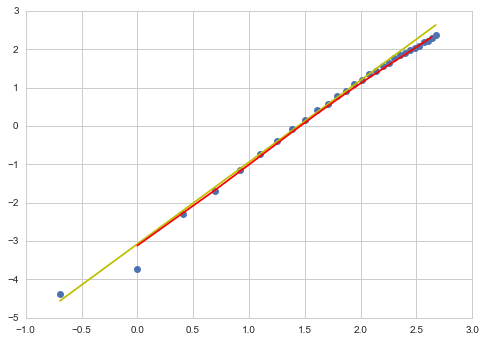

In [49]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y')

# 3. OEN3 distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r')

plt.show()

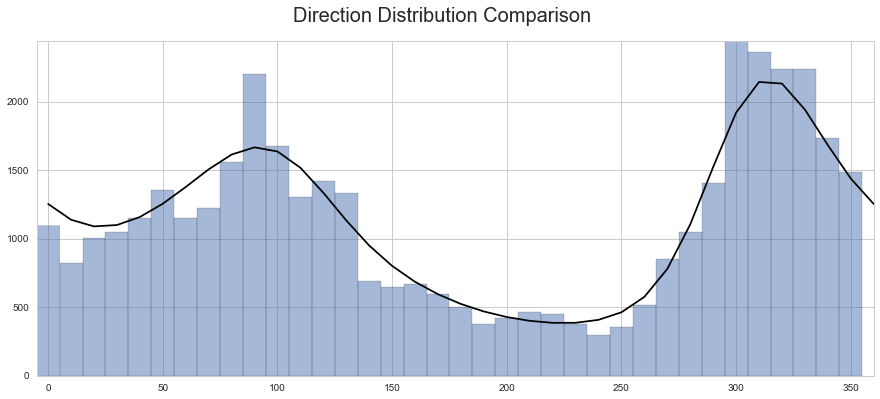

In [50]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.show()

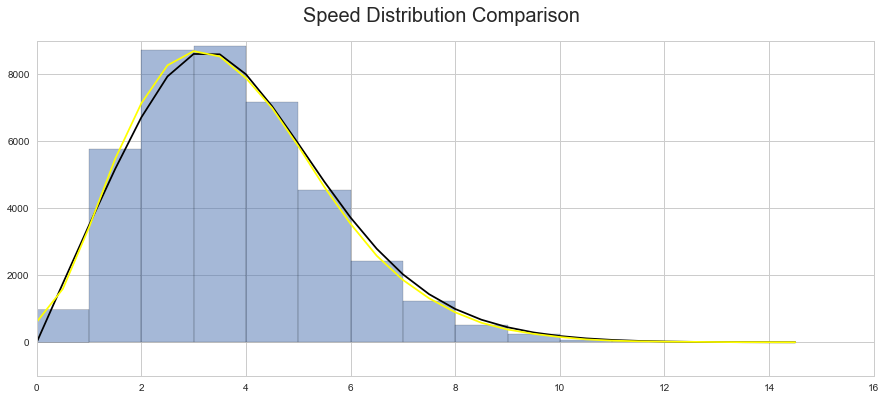

In [51]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

## 5.3 Sectoral Comaprison

In [52]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x = linspace(0, sub_max_speed, 20)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

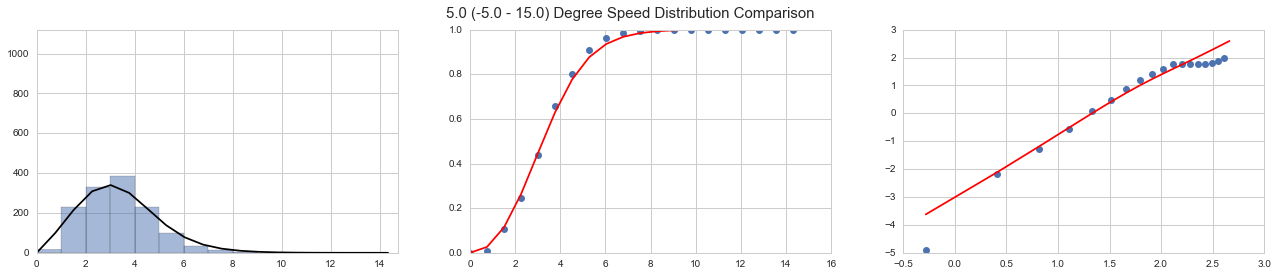

data size: 1349
max diff: 0.0333962498596 , speed value: 5.28143350313 y gmm 0.876166389132

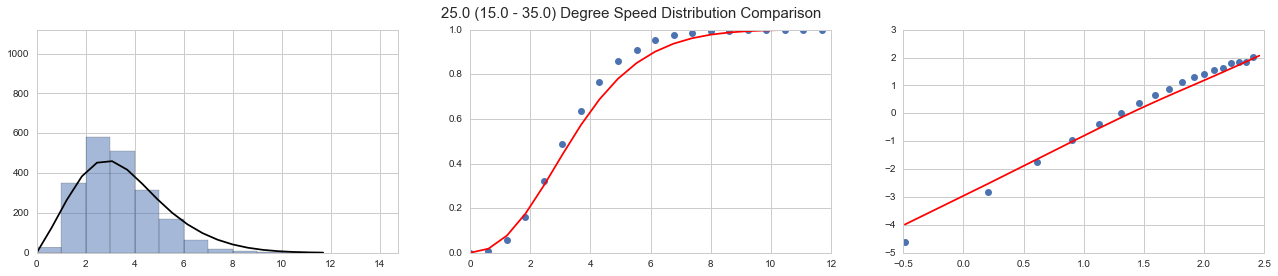

 data size: 2053
max diff: 0.0789117878671 , speed value: 4.30492612269 y gmm 0.687771115202

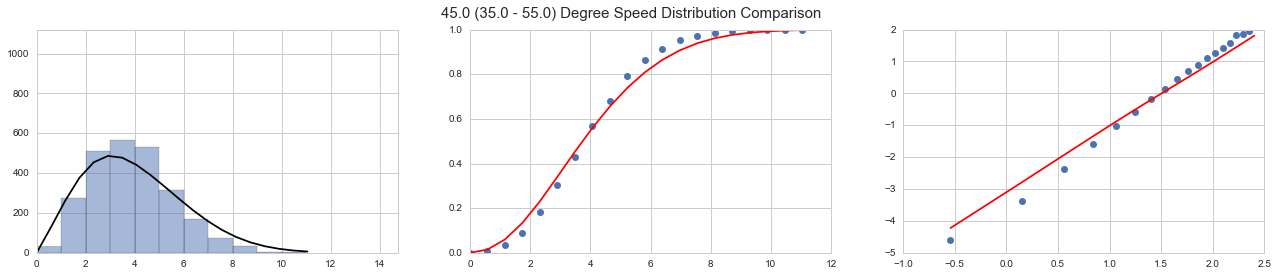

 data size: 2513
max diff: 0.0549531102631 , speed value: 5.81461390472 y gmm 0.808954569801

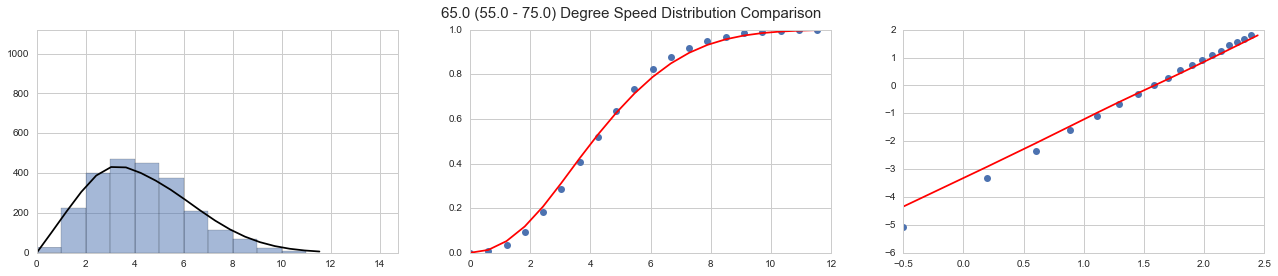

 data size: 2379
max diff: 0.0372746744507 , speed value: 6.07172313319 y gmm 0.787861937571

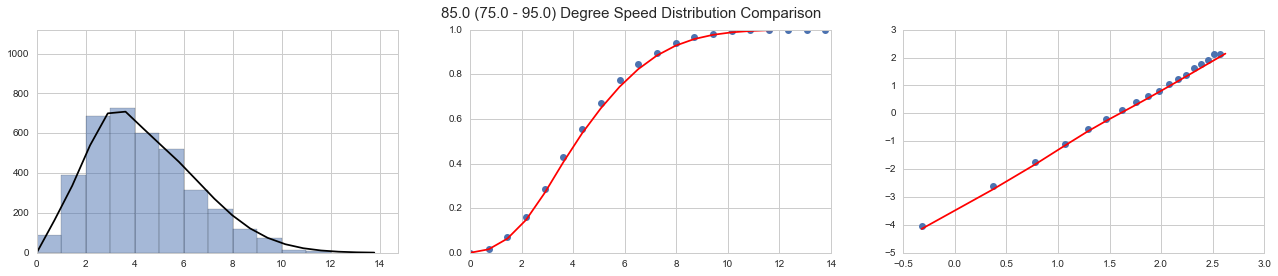

 data size: 3763
max diff: 0.0291289614292 , speed value: 5.79950489795 y gmm 0.743658707983

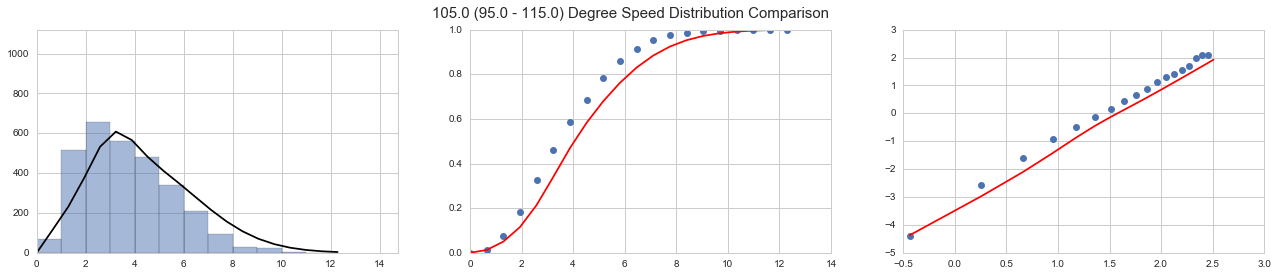

 data size: 2980
max diff: 0.122293983301 , speed value: 3.2308997588 y gmm 0.340122124082

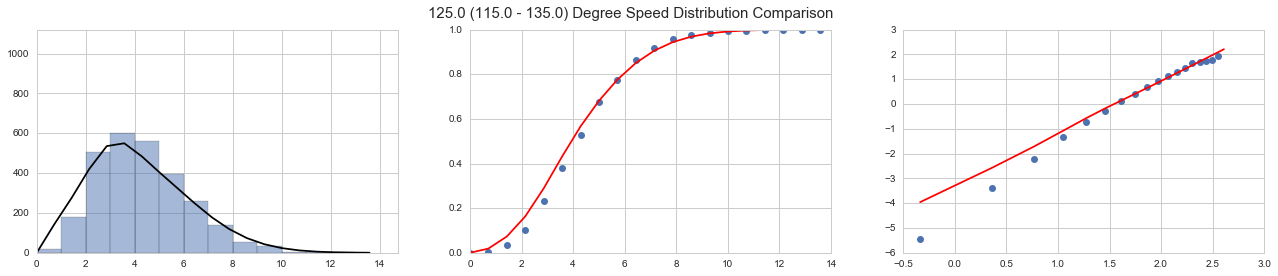

 data size: 2760
max diff: 0.0606414841799 , speed value: 2.14408005524 y gmm 0.163177716064

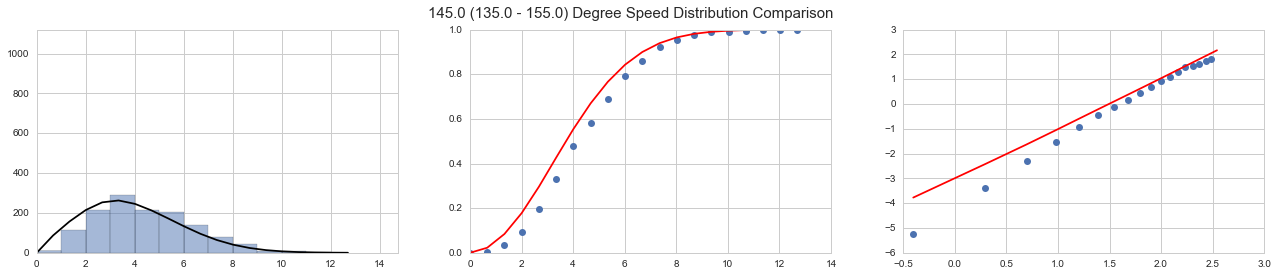

 data size: 1336
max diff: 0.0984454931962 , speed value: 2.67337608495 y gmm 0.296050283615

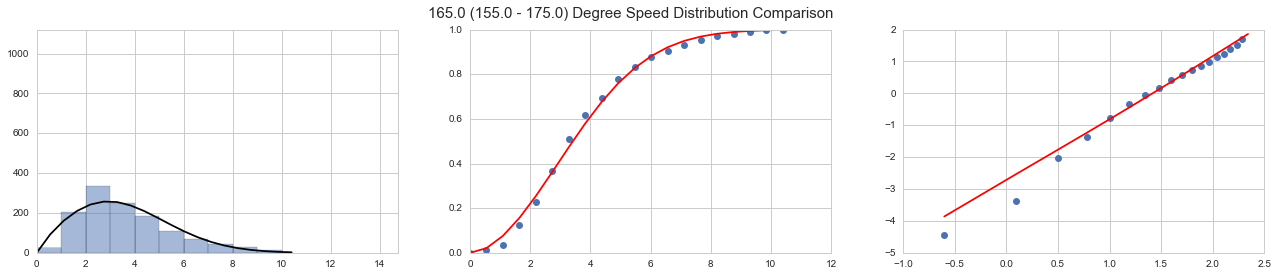

 data size: 1271
max diff: 0.0420530264303 , speed value: 1.09499255192 y gmm 0.0758846550692

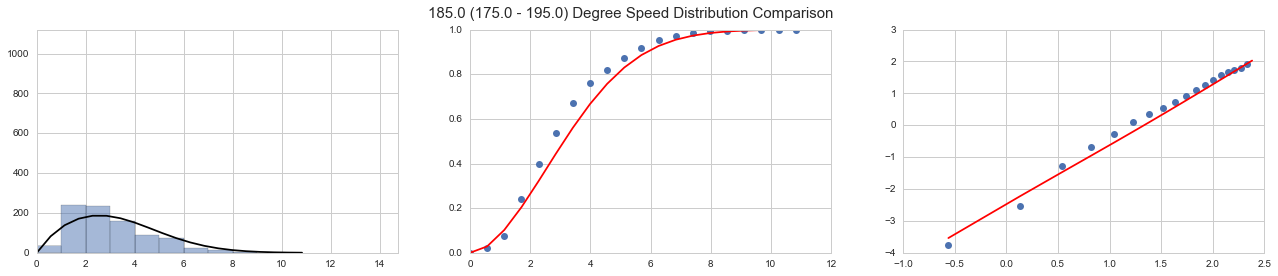

 data size: 876
max diff: 0.109971398085 , speed value: 3.41887051689 y gmm 0.560119926116

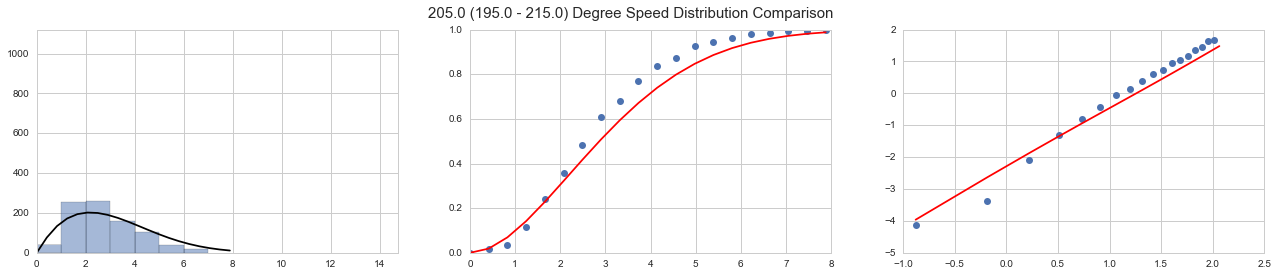

 data size: 885
max diff: 0.102155962173 , speed value: 2.90398604846 y gmm 0.508013529353

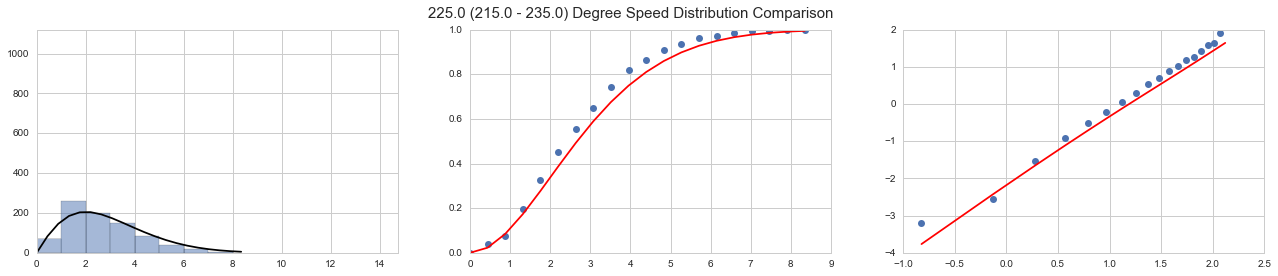

 data size: 828
max diff: 0.0713311978103 , speed value: 3.95182067019 y gmm 0.748717111368

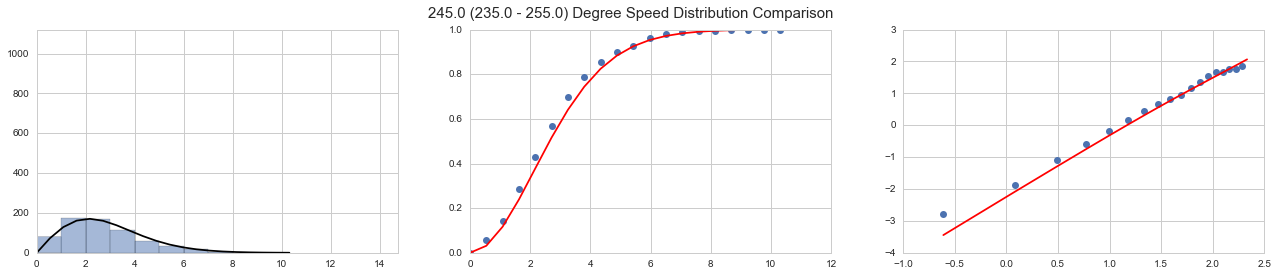

 data size: 655
max diff: 0.0569055378986 , speed value: 3.25558677424 y gmm 0.640804385766

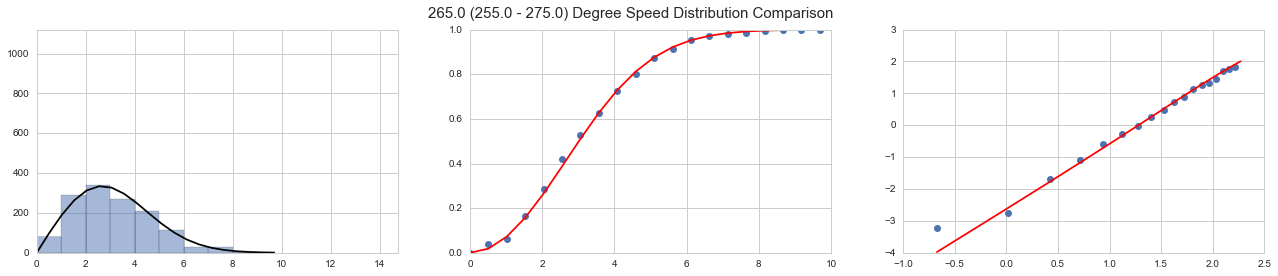

 data size: 1371
max diff: 0.0347325181119 , speed value: 2.54977730452 y gmm 0.386857562122

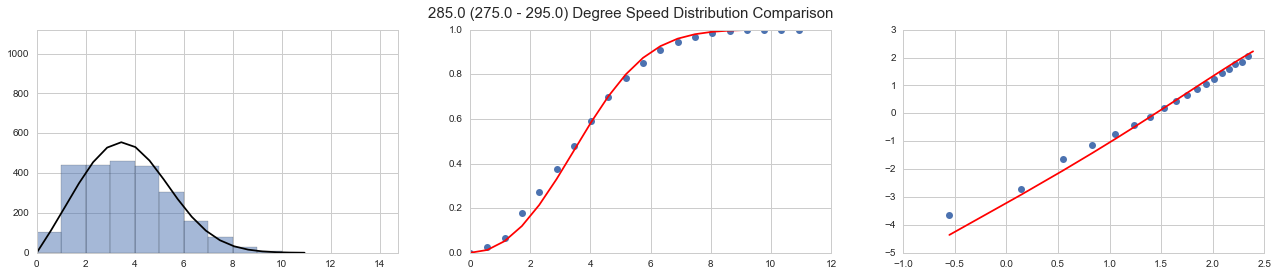

 data size: 2464
max diff: 0.0593846165912 , speed value: 2.30077164976 y gmm 0.214154344448

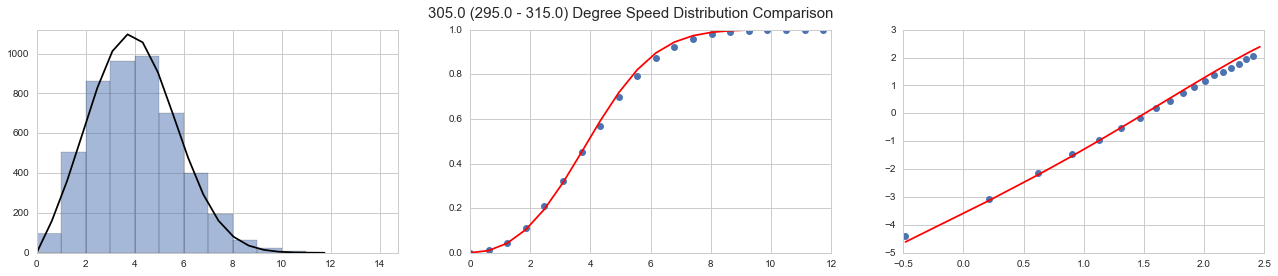

 data size: 4812
max diff: 0.0291059821746 , speed value: 5.56146228003 y gmm 0.820460928143

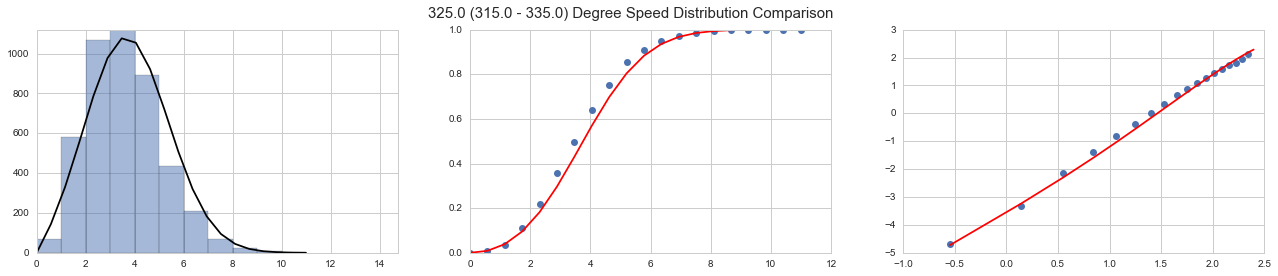

 data size: 4485
max diff: 0.0712663285758 , speed value: 4.04735082727 y gmm 0.568867450688

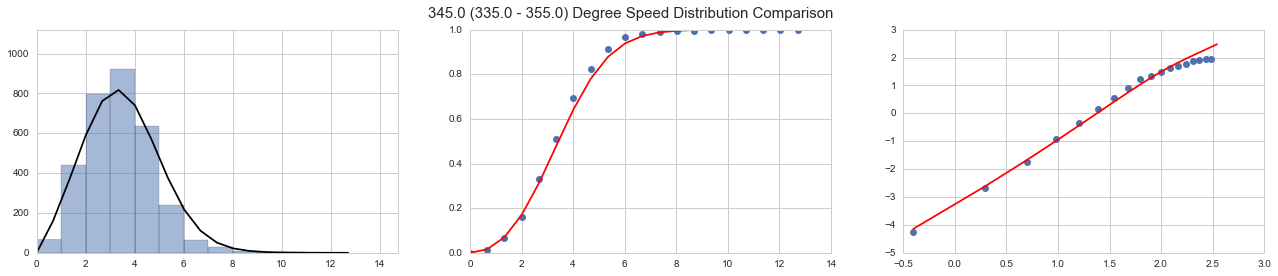

 data size: 3218
max diff: 0.0515774905814 , speed value: 4.01115227451 y gmm 0.642331769829


In [53]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variance over the years

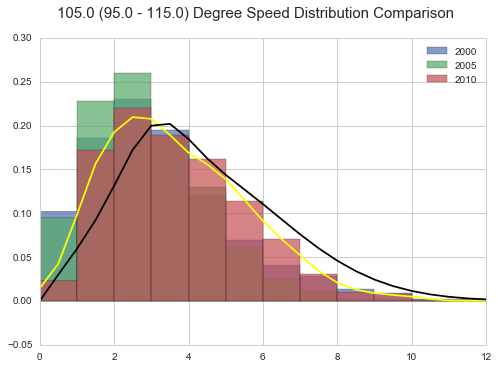

In [54]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

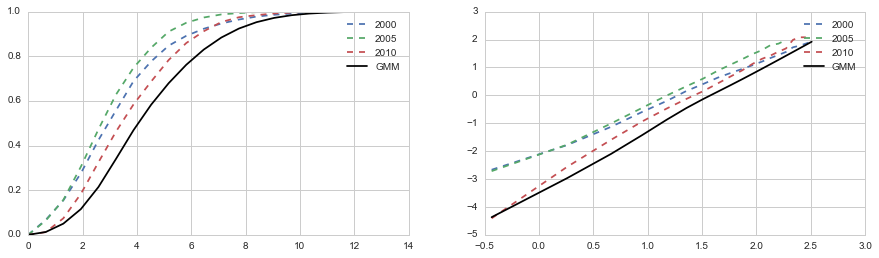

In [55]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variance of each sector

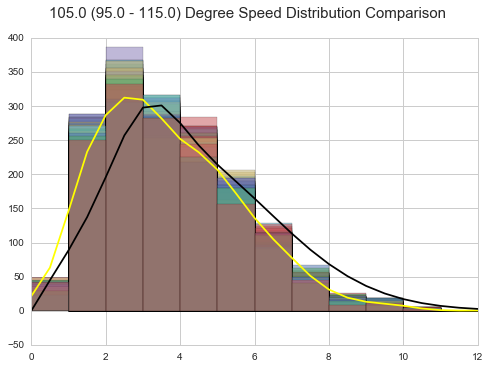

In [56]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.144294296103 3.87707971056 0.469128522689


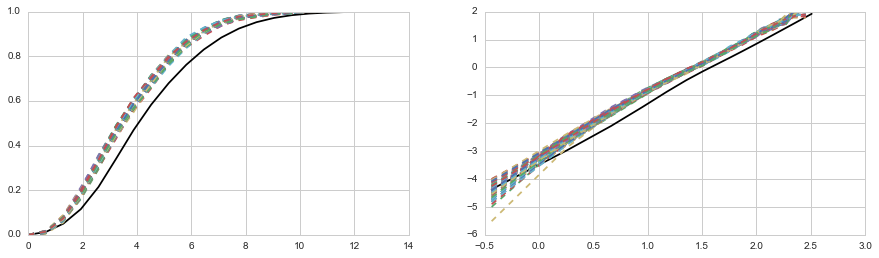

In [57]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variance of results & Cross Validation

In [58]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variance of the Result

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.458533  2.265016 -1.799600  1.704705  2.086416 -0.063662
2  0.434902 -0.464450  2.157099  2.439389  3.107787  0.212217
3  0.106565  0.290824  3.029058  3.153942  1.250582 -0.171228

GMM Plot Result
0.458532758155 [[ 2.26501554 -1.79960011]] [ 1.69452541  2.09469203] -171.311524462
0.434902191569 [[-0.46444963  2.15709901]] [ 2.31297576  3.20298305] 159.523759096
0.106565050276 [[ 0.29082366  3.02905847]] [ 1.22877791  3.16250012] -94.5764239328


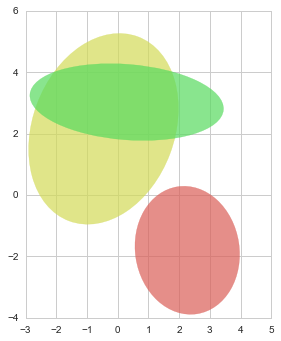

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.021684  0.008151  1.750816e-07    0.018174     0.122024  0.992474

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.581945  0.080516  1.813497  2.816981  3.062694 -0.004382
2  0.378679  2.262507 -1.941142  1.669162  1.996597 -0.082941
3  0.039376 -0.508747  2.883689  1.577494  0.913111 -0.009291

GMM Plot Result
0.581945126289 [[ 0.08051593  1.81349745]] [ 2.81680519  3.0628551 ] -178.501976613
0.378678624729 [[ 2.26250719 -1.94114162]] [ 1.65091018  2.01171427] -167.635174282
0.0393762489821 [[-0.50874721  2.88368947]] [ 0.91305218  1.57752871] -90.4633619045


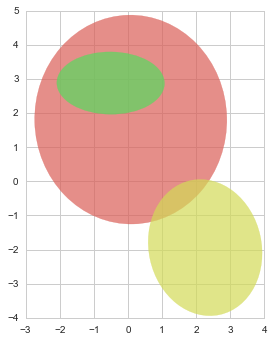

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017907  0.009777  2.018542e-07    0.019178     0.131024  0.991484

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.583345  0.000551  2.060501  2.792058  2.952757  0.031064
2  0.389142  2.265039 -1.967579  1.655231  1.965879 -0.075001
3  0.027513 -0.418028  2.676906  1.024892  0.805598 -0.003848

GMM Plot Result
0.583345087 [[  5.51125305e-04   2.06050061e+00]] [ 2.78016254  2.96395979] 165.488828638
0.389141902154 [[ 2.26503913 -1.96757903]] [ 1.63985427  1.97872319] -168.271665297
0.0275130108459 [[-0.41802754  2.67690631]] [ 0.80558198  1.02490441] -90.4534079016


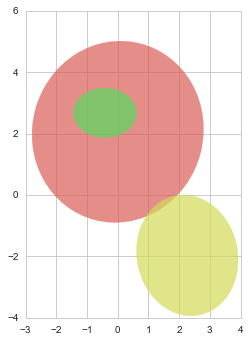

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.021325  0.013288  1.778137e-07    0.017953     0.122985  0.992521

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.450727  2.281457 -1.805902  1.698794  2.057967 -0.060520
2  0.448225 -0.426045  2.005575  2.357046  3.048011  0.197128
3  0.101048  0.413595  3.054706  3.367868  1.238823 -0.205697

GMM Plot Result
0.450726910591 [[ 2.28145735 -1.80590162]] [ 1.68923085  2.06582413] -171.293991349
0.448224898935 [[-0.42604532  2.00557522]] [ 2.25374483  3.1251678 ] 161.411375375
0.101048190474 [[ 0.41359502  3.05470566]] [ 1.20836853  3.37891465] -94.9632400519


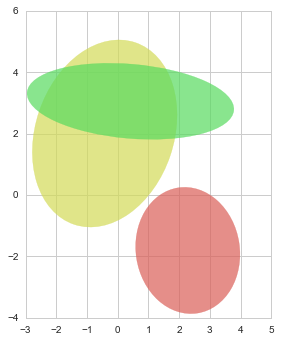

Chi_square      K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.022694  0.00888  1.902896e-07    0.019033     0.127113  0.991997

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.582939 -0.034012  2.061362  2.762093  2.920619  0.045287
2  0.394704  2.275259 -1.959818  1.679768  2.011145 -0.074758
3  0.022357 -0.521217  2.603960  0.947363  0.751203 -0.091140

GMM Plot Result
0.582938968708 [[-0.0340125   2.06136169]] [ 2.73854497  2.94271031] 160.477816602
0.39470420479 [[ 2.27525862 -1.9598178 ]] [ 1.66478926  2.02356133] -168.780265215
0.0223568265021 [[-0.52121722  2.60395961]] [ 0.74305081  0.95376971] -100.636248576


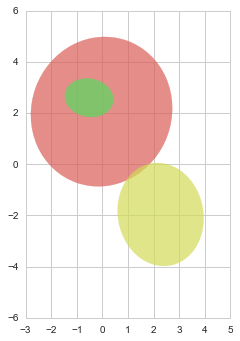

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0     0.01567  0.013116  1.695403e-07     0.01774     0.120084  0.992796

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.579454  0.029444  2.061623  2.823732  2.894997  0.009787
2  0.395532  2.238787 -1.999798  1.691620  1.975305 -0.085816
3  0.025014 -0.444540  2.740854  1.032566  0.822199  0.011216

GMM Plot Result
0.579453592194 [[ 0.02944365  2.0616225 ]] [ 2.82104964  2.89761124] 169.281952758
0.395532213219 [[ 2.23878699 -1.99979843]] [ 1.66966173  1.99390003] -165.565829567
0.0250141945869 [[-0.44454027  2.7408541 ]] [ 0.82205791  1.03267811] -88.6028572497


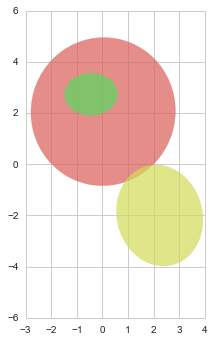

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017817  0.012921  1.787422e-07    0.018378     0.123233  0.992471

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.597043  0.078512  1.908013  2.769747  3.043182  0.009524
2  0.371317  2.278222 -1.996962  1.643636  1.982745 -0.057117
3  0.031640 -0.550116  2.807089  1.300317  0.865061 -0.110761

GMM Plot Result
0.597042653246 [[ 0.07851241  1.90801316]] [ 2.76901646  3.04384691] 177.115915263
0.371316968942 [[ 2.27822176 -1.99696214]] [ 1.63523136  1.98968205] -171.578760146
0.0316403778123 [[-0.5501161   2.80708865]] [ 0.85565134  1.30652869] -97.4046364996


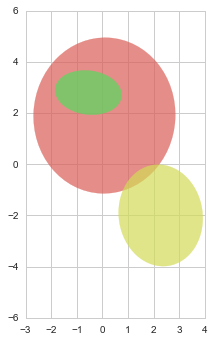

Chi_square      K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017935  0.01166  1.840287e-07    0.018696     0.125109  0.992175

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.470932  2.203815 -1.712860  1.732950  2.093839 -0.055318
2  0.415860 -0.485695  2.193066  2.411362  3.056800  0.262782
3  0.113207  0.188840  3.080380  3.244152  1.280610 -0.203049

GMM Plot Result
0.47093240898 [[ 2.20381542 -1.71286024]] [ 1.72468395  2.10065277] -171.895935198
0.415860484625 [[-0.48569527  2.19306633]] [ 2.22689115  3.19368931] 156.167497616
0.113207106395 [[ 0.1888405   3.08038044]] [ 1.24923025  3.25636369] -95.3760702862


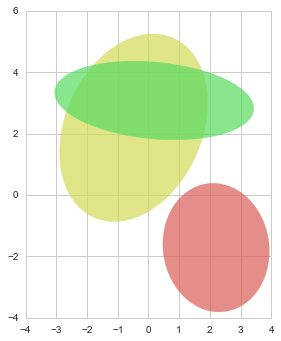

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.022865  0.009661  2.122674e-07    0.019872     0.134333  0.990971

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.587390  0.128625  1.832809  2.851211  3.073180 -0.012577
2  0.368885  2.268772 -1.974883  1.638954  1.975455 -0.074698
3  0.043725 -0.668922  2.819252  1.540532  0.935151 -0.013116

GMM Plot Result
0.587389529527 [[ 0.12862452  1.83280858]] [ 2.84960241  3.0746715 ] -175.24251131
0.368885001215 [[ 2.2687719 -1.9748827]] [ 1.62475922  1.98714629] -169.156304853
0.043725469258 [[-0.66892212  2.81925156]] [ 0.93502401  1.54060972] -90.7222152061


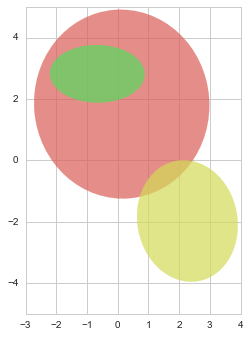

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.018009  0.010131  1.764537e-07    0.018183     0.122473  0.992496

weight    mean_x    mean_y     sig_x     sig_y      corr
1  0.606260  0.108486  1.929283  2.792784  3.012358  0.002427
2  0.369042  2.298224 -2.015302  1.637395  2.009708 -0.070019
3  0.024698 -0.543781  2.682852  0.952325  0.798366 -0.010690

GMM Plot Result
0.606260078071 [[ 0.10848649  1.92928282]] [ 2.79272507  3.01241238] 179.082629577
0.369042016255 [[ 2.2982235  -2.01530229]] [ 1.62574022  2.01914824] -170.62705849
0.0246979056738 [[-0.54378097  2.68285185]] [ 0.79821296  0.95245373] -91.7256302978


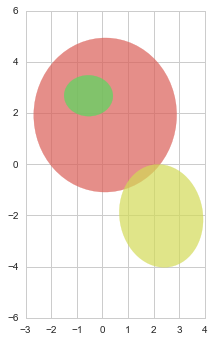

Chi_square      K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.015973  0.01176  1.743246e-07    0.018396     0.121794  0.992517

In [59]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross validation, to select the number of Gaussian

In [60]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 30427.5 10142.5
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.082538  0.048946  0.000002    0.062786     0.420418  0.911688
1    0.088335  0.049547  0.000002    0.063720     0.428210  0.908511
2    0.085042  0.050170  0.000002    0.062799     0.429423  0.908216
3    0.087305  0.049096  0.000002    0.063130     0.423674  0.909962

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.099007  0.049971  0.000002    0.063355     0.435686  0.905424
1    0.080138  0.055487  0.000002    0.063062     0.429136  0.907776
2    0.091620  0.045810  0.000002    0.062450     0.410178  0.915236
3    0.090166  0.054330  0.000002    0.064833     0.442951  0.903426

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.022442  0.015433  2.921374e-07    0.023090     0.157575  0.987648
1    0.019625  0.015185  2.638337e-07    0.022509     0.149766  0.988768
2    0.022745  0.014801  2.750634e-07    0.022715     0.153035  0.988256
3    0.021418  0.015430  2.789357e-07    0.022829     0.154100  0.988167

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.029051  0.019629  2.905531e-07    0.024251     0.157436  0.987490
1    0.028626  0.017409  3.445050e-07    0.024463     0.171363  0.985452
2    0.018199  0.011280  3.274995e-07    0.024684     0.166705  0.986298
3    0.025741  0.016053  3.038814e-07    0.023919     0.160608  0.987035

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.016001  0.012953  1.882885e-07    0.018793     0.126546  0.991978
1    0.019253  0.011019  1.726146e-07    0.018053     0.121182  0.992640
2    0.018564  0.009413  1.896880e-07    0.018904     0.127033  0.991923
3    0.020494  0.009011  2.038063e-07    0.019368     0.131687  0.991410

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024494  0.015668  2.054117e-07    0.019551     0.132244  0.991348
1    0.020092  0.014835  2.582147e-07    0.021706     0.148203  0.989148
2    0.017495  0.010327  2.305146e-07    0.020576     0.140031  0.990279
3    0.033818  0.018692  2.466762e-07    0.022050     0.144819  0.989281

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.015135  0.006199  1.083326e-07    0.014189     0.095984  0.995414
1    0.014987  0.006274  1.097344e-07    0.014473     0.096619  0.995345
2    0.010279  0.006767  8.482648e-08    0.012526     0.084973  0.996378
3    0.014277  0.008889  8.288382e-08    0.012455     0.083961  0.996476

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.022572  0.009594  1.759045e-07    0.018346     0.122391  0.992451
1    0.023595  0.005660  1.692050e-07    0.017292     0.119979  0.992780
2    0.012346  0.013302  1.299715e-07    0.015886     0.105062  0.994565
3    0.014591  0.011339  1.360860e-07    0.015964     0.107633  0.994239

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.009404  0.005579  4.900578e-08    0.009606     0.064561  0.997902
1    0.012301  0.005404  5.112282e-08    0.009840     0.065949  0.997814
2    0.008661  0.005449  5.265181e-08    0.009904     0.066918  0.997777
3    0.009369  0.004092  5.615310e-08    0.010188     0.069131  0.997631

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.014291  0.006797  1.303414e-07    0.015487     0.105334  0.994593
1    0.012516  0.012880  1.153427e-07    0.014443     0.099051  0.995196
2    0.014156  0.016284  1.229802e-07    0.015281     0.102326  0.994678
3    0.017406  0.009062  9.318031e-08    0.013462     0.088976  0.995958

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.007020  0.003225  3.859254e-08    0.008405     0.057259  0.998372
1    0.006650  0.003035  4.247119e-08    0.008832     0.060115  0.998203
2    0.011295  0.003151  5.258031e-08    0.010087     0.066904  0.997755
3    0.010253  0.004865  5.525425e-08    0.010215     0.068577  0.997636

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.009347  0.008284  1.190403e-07    0.015450     0.100840  0.994843
1    0.010837  0.010832  1.086354e-07    0.014682     0.096106  0.995333
2    0.019217  0.009635  1.113917e-07    0.013762     0.097245  0.995338
3    0.015348  0.011698  9.969095e-08    0.013482     0.092026  0.995852

In [61]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.085805  0.049440  2.127686e-06    0.063109     0.425432  0.909594
1    0.021557  0.015212  2.774926e-07    0.022786     0.153619  0.988210
2    0.018578  0.010599  1.885993e-07    0.018779     0.126612  0.991988
3    0.013670  0.007032  9.644432e-08    0.013411     0.090384  0.995903
4    0.009934  0.005131  5.223338e-08    0.009884     0.066640  0.997781
5    0.008804  0.003569  4.722457e-08    0.009385     0.063214  0.997992

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.090233  0.051400  2.169960e-06    0.063425     0.429488  0.907966
1    0.025404  0.016093  3.166097e-07    0.024329     0.164028  0.986569
2    0.023975  0.014881  2.352043e-07    0.020970     0.141324  0.990014
3    0.018276  0.009974  1.527918e-07    0.016872     0.113766  0.993509
4    0.014592  0.011256  1.154612e-07    0.014668     0.098922  0.995106
5    0.013687  0.010112  1.096896e-07    0.014344     0.096554  0.995342

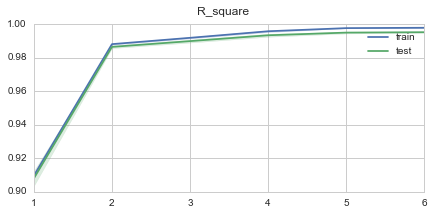

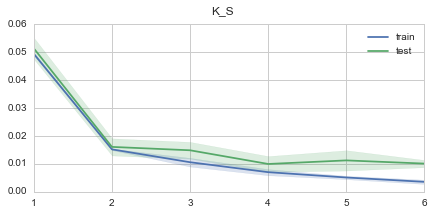

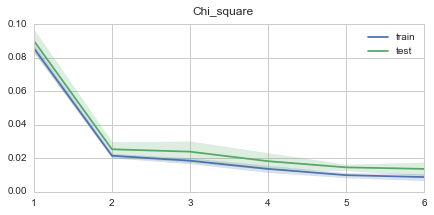

In [62]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend()
    plt.show()

In [63]:
# Save result to HTML
location_name = get_location_name(uipath)
current_file = 'time_shift.ipynb'
output_file = './output_HTML/'+location_name+'.HTML' 
output_HTML(current_file, output_file)

## 6.3 Variance of KDE

In [64]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        